In [1]:
import numpy as np
import scipy
import scipy.spatial

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

## Aula 02 - Distância e Similaridade

### Euclidiana

In [3]:
pa = np.asarray([23, 2, 2])
pb = np.asarray([40, 10, 1])

pa - pb

array([-17,  -8,   1])

A função `np.linalg.norm` (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) implementa $$[\sum abs(x)^{ord}]^{\frac{1}{ord}}$$

onde `ord` é um parâmetro, por padrão igual a 2.

Assim, o código abaixo calcula a distância euclideana entre os vetores `pa` e `pb`

In [5]:
np.linalg.norm(pa-pb)

18.81488772222678

### Problemas

#### 1. Escala

Repare como o fato de uma das dimensões ter uma escala muito maior do que as demais faz com que a distância entre os vetores seja pouco afetada por mudanças nessas dimensões de valores menores.

In [6]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 1, 1])
np.linalg.norm(pa-pb)

79.02531240052139

In [7]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 5, 1])
np.linalg.norm(pa-pb)

79.12648102879339

In [8]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 5, 2])
np.linalg.norm(pa-pb)

79.10752176626443

#### Maldição da dimensionalidade

In [77]:
M = np.random.normal(0, 1, (5, 3))

In [169]:
M

array([[ 0.11141985,  0.09187292,  0.59756961],
       [ 2.21711167, -0.33538136, -0.44825497],
       [-0.50932077, -0.10737255,  1.40540813],
       [-2.53933553,  0.60415437, -0.33705056],
       [-0.77784774, -1.62468154,  0.11726113]])

In [170]:
dist_mtx = scipy.spatial.distance_matrix(M, M, p=2)
dist_mtx

array([[0.        , 2.38960944, 1.03808514, 2.8570004 , 1.99199707],
       [2.38960944, 0.        , 3.30476758, 4.84962718, 3.30936328],
       [1.03808514, 3.30476758, 0.        , 2.76828336, 2.00839637],
       [2.8570004 , 4.84962718, 2.76828336, 0.        , 2.87696852],
       [1.99199707, 3.30936328, 2.00839637, 2.87696852, 0.        ]])

In [171]:
max_dist = np.max(dist_mtx, 1)
max_dist

array([2.8570004 , 4.84962718, 3.30476758, 4.84962718, 3.30936328])

In [172]:
np.fill_diagonal(dist_mtx, 999)
min_dist = np.min(dist_mtx, 1)
min_dist

array([1.03808514, 2.38960944, 1.03808514, 2.76828336, 1.99199707])

In [173]:
dist_ratio = max_dist / min_dist
dist_ratio

array([2.75218313, 2.02946435, 3.18352268, 1.7518536 , 1.66132939])

Text(0, 0.5, 'Ratio Max/Min')

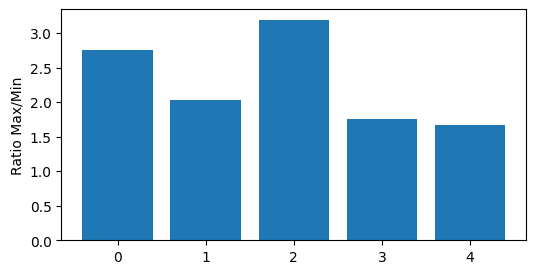

In [82]:
y_pos = np.arange(len(dist_ratio))
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.bar(y_pos, dist_ratio)
ax.set_ylabel('Ratio Max/Min')

In [83]:
def show_ratio_plot(n_samples, n_dimensions):
    M = np.random.normal(0, 1, (n_samples, n_dimensions))
    dist_mtx = scipy.spatial.distance_matrix(M, M, p=2)
    max_dist = np.max(dist_mtx, 1)
    np.fill_diagonal(dist_mtx, 999)
    min_dist = np.min(dist_mtx, 1)
    dist_ratio = max_dist / min_dist

    y_pos = np.arange(len(dist_ratio))
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.bar(y_pos, dist_ratio)
    ax.set_ylabel('Ratio Max/Min')

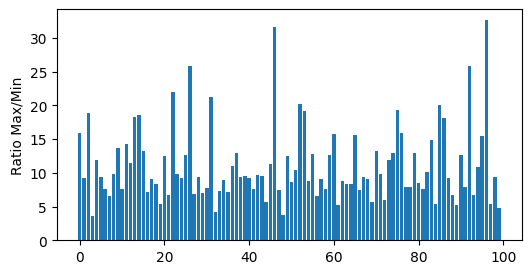

In [84]:
show_ratio_plot(100, 3)

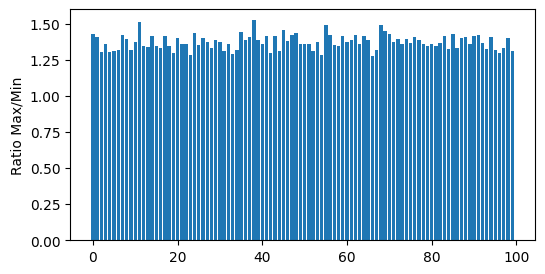

In [85]:
show_ratio_plot(100, 100)

## Aula 03 - KMeans

### Exemplo 01 - USArrests

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [5]:
df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


#### EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [7]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


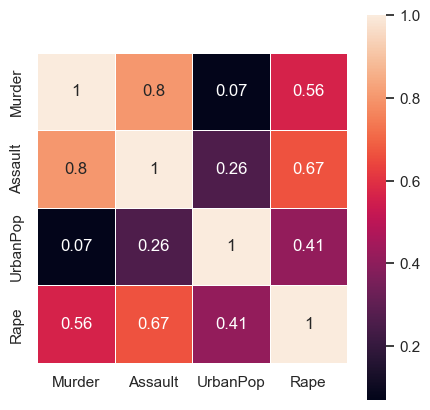

In [8]:
corr = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

In [9]:
def plot_dist_matrix(df, figsize=(12, 10)):
    dist_mtx = scipy.spatial.distance_matrix(df, df, p=2)
    dist_mtx_df = pd.DataFrame(dist_mtx, index=df.index, columns=df.index)
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(dist_mtx_df, center=0, square=True, annot=False);

In [10]:
# normalized_df = (df-df.mean())/df.std()
# normalized_df = (df-df.min())/(df.max()-df.min())

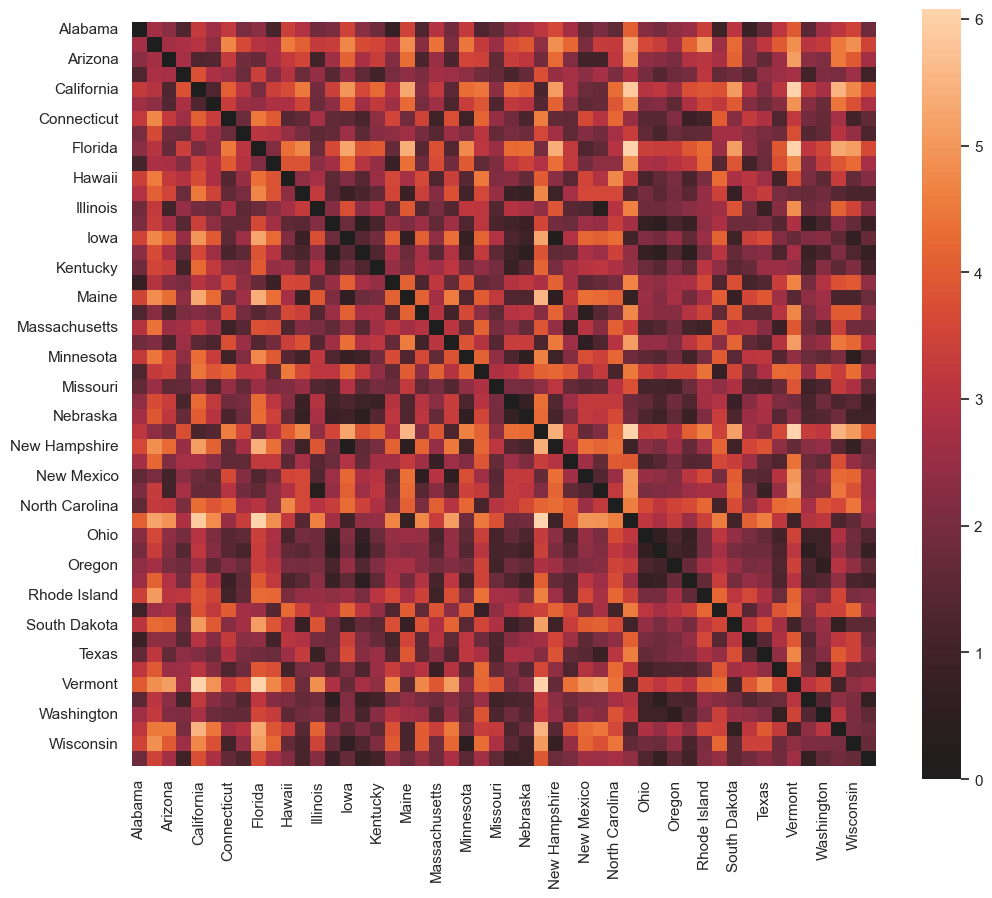

In [11]:
plot_dist_matrix((df-df.mean())/df.std())

#### Escolha do número de clusters

In [12]:
normalized_df = (df-df.mean())/df.std()
normalized_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820


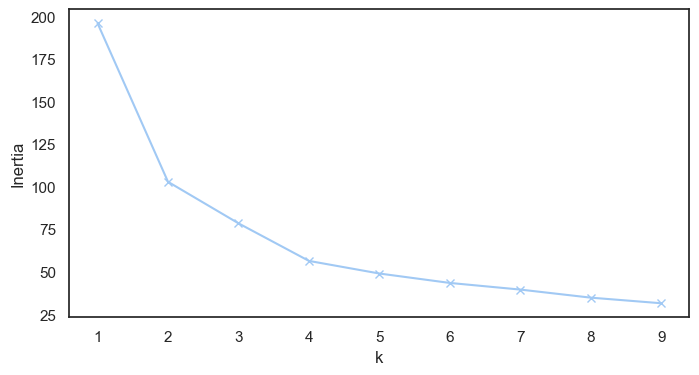

In [13]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(normalized_df)

##### Extra!

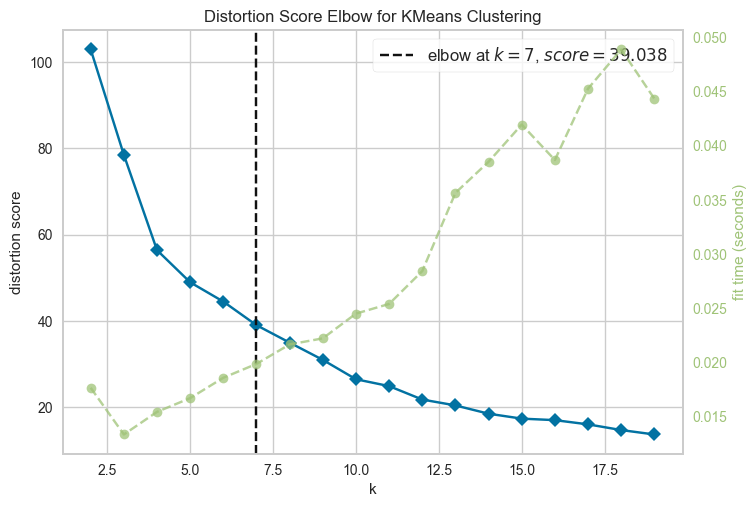

In [168]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(normalized_df); 
visualizer.poof();

#### Clustering

In [14]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(normalized_df)

In [15]:
k_fit.cluster_centers_

array([[-0.44427838, -0.35498392,  0.5600823 , -0.20250139],
       [ 0.72980359,  1.1188219 ,  0.75717991,  1.32135653],
       [ 1.41188984,  0.8743346 , -0.81452109,  0.01927104],
       [-0.96154072, -1.106601  , -0.93010687, -0.96676331]])

In [16]:
clusters = k_fit.labels_
clusters

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [17]:
cluster_df = df.copy()
cluster_df['cluster'] = clusters
cluster_df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [18]:
cluster_df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.852941,141.176471,73.647059,19.335294
1,10.966667,264.000000,76.500000,33.608333
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [95]:
def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)

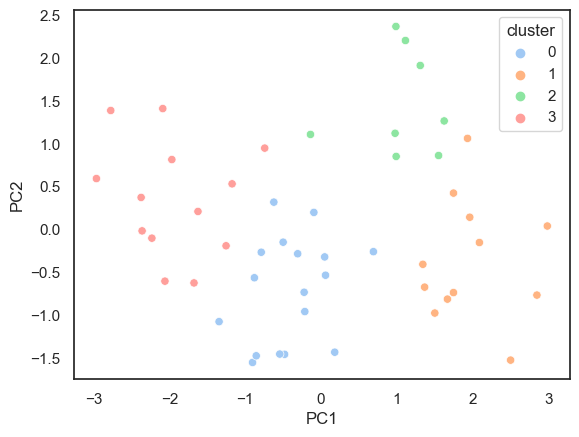

In [20]:
plot_cluster_points(normalized_df, kmeans.labels_)

## Aula 04 - KMeans aplicado a imagens

### Color quantization

Processo de reduzir o número de cores representadas em uma imagem com o objetivo de comprimir seu tamanho.

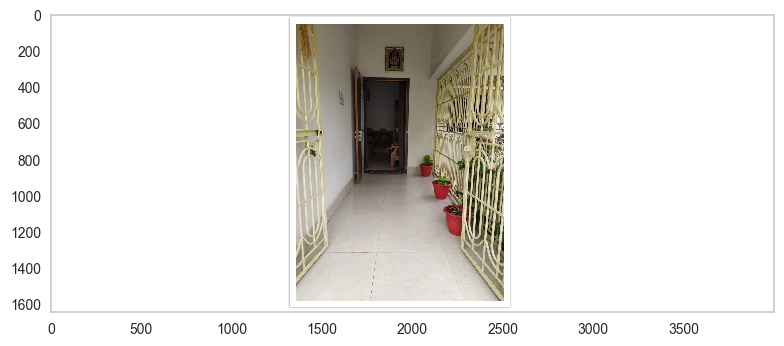

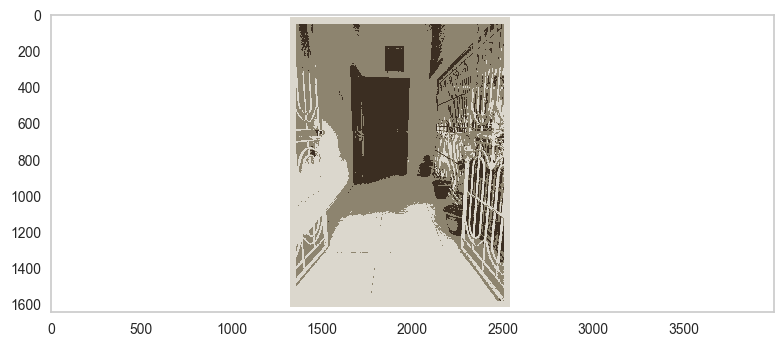

In [246]:
from skimage import io

#Read the image
image = io.imread('door_img.png')
io.imshow(image)
plt.grid(False)
io.show()

#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 4)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 4)

#Save and display output image
# io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
plt.grid(False)
io.show()

## Aula 05 - Clusterização Hierárquica

In [21]:
import scipy.cluster.hierarchy as sch

df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Text(0, 0.5, 'Euclidean Distance')

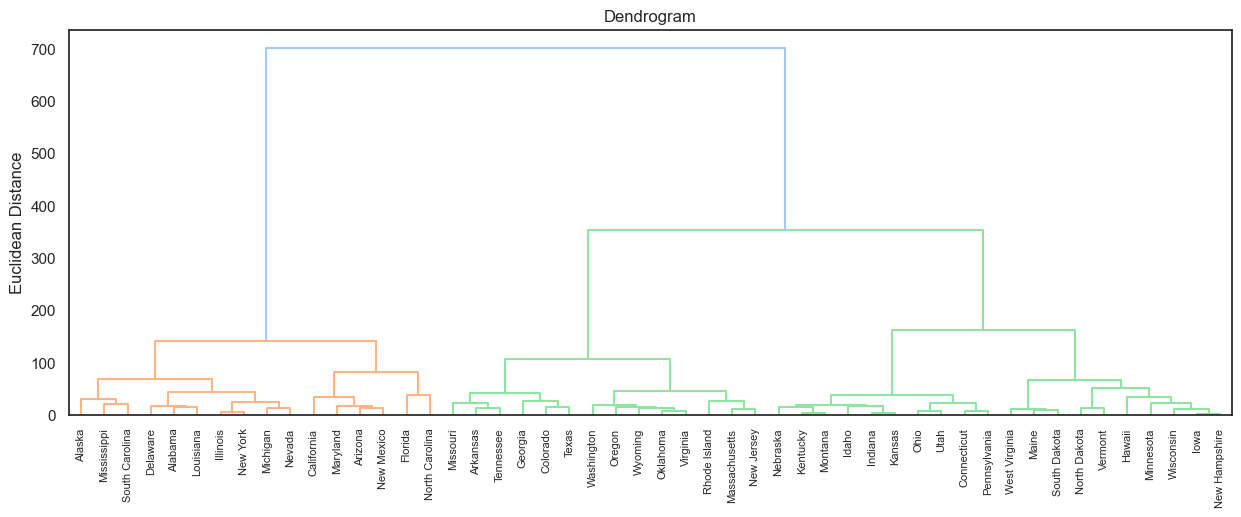

In [22]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [23]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'Euclidean Distance')

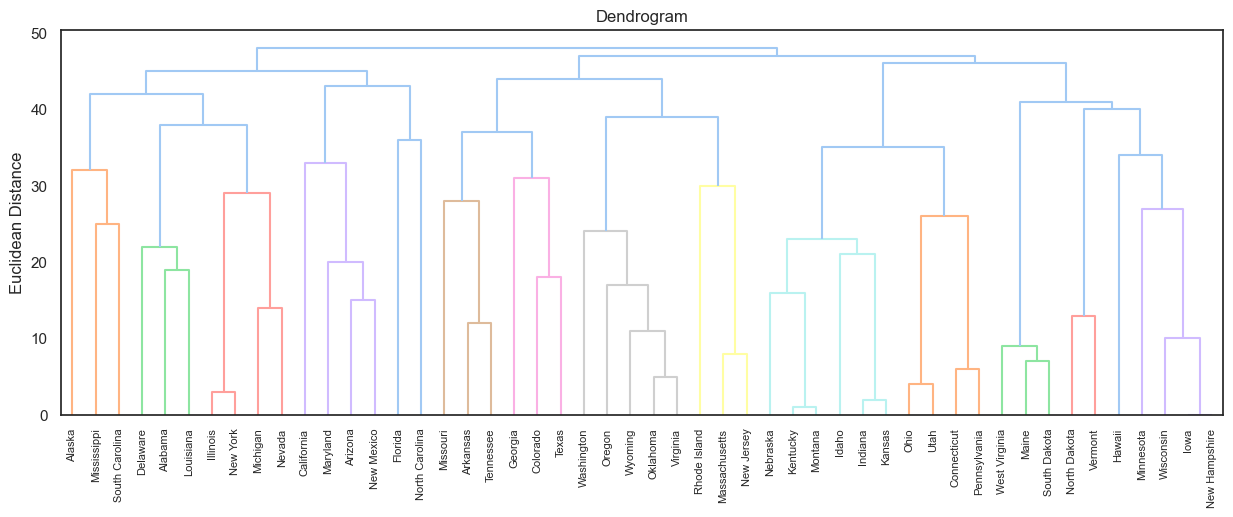

In [29]:
from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=1, affinity = "euclidean",
                             linkage = 'ward')
hc_pred = hc.fit_predict(df)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(hc, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

## Aula 06 - Clusterização Hierárquica - Aplicações

In [33]:
from sklearn.metrics import confusion_matrix

def plot_dendrogram_2(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

### Iris

Vamos clusterizar a base de dados Iris

#### EDA

Análise exploratória dos dados

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [128]:
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


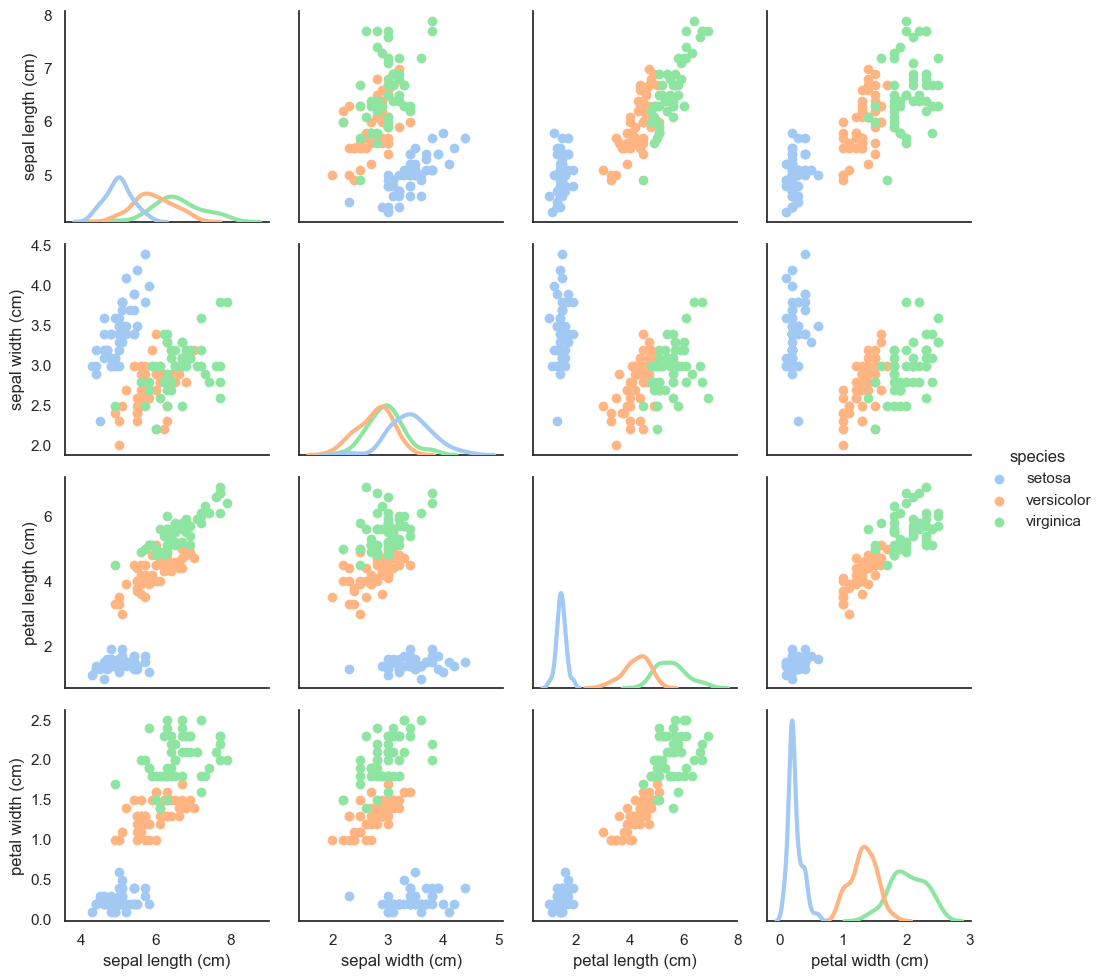

In [129]:
g = sns.PairGrid(iris_df, vars=iris.feature_names, hue='species')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

#### Clusterização

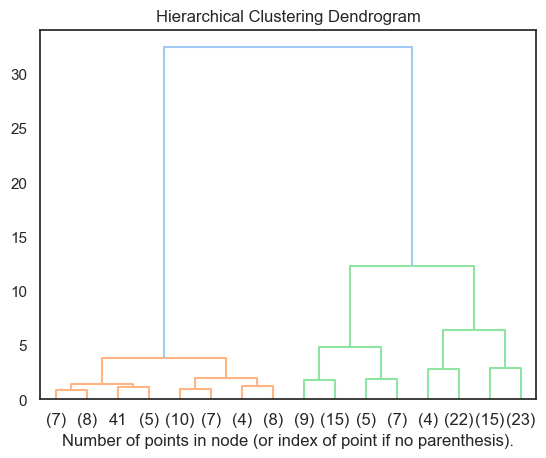

In [130]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(iris.data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram_2(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [140]:
X = (iris.data - iris.data.mean(axis=0)) / iris.data.std(axis=0)

In [141]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(X)

iris_df['hier_cluster'] = agg_model.labels_

In [142]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

iris_df['kmeans_cluster'] = kmeans_model.labels_

In [143]:
confusion_matrix(iris.target, iris_df['kmeans_cluster'])

array([[ 0, 50,  0],
       [11,  0, 39],
       [36,  0, 14]])

In [144]:
confusion_matrix(iris.target, iris_df['hier_cluster'])

array([[ 0, 49,  1],
       [23,  0, 27],
       [48,  0,  2]])

In [147]:
iris_df.groupby('species').mean().drop(['hier_cluster', 'kmeans_cluster'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [148]:
iris_df.groupby('kmeans_cluster').mean().drop(['hier_cluster'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
kmeans_cluster,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


In [149]:
iris_df[iris_df['hier_cluster'] != iris_df['kmeans_cluster']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,hier_cluster,kmeans_cluster
41,4.5,2.3,1.3,0.3,setosa,2,1
54,6.5,2.8,4.6,1.5,versicolor,0,2
58,6.6,2.9,4.6,1.3,versicolor,0,2
61,5.9,3.0,4.2,1.5,versicolor,0,2
63,6.1,2.9,4.7,1.4,versicolor,0,2
71,6.1,2.8,4.0,1.3,versicolor,0,2
72,6.3,2.5,4.9,1.5,versicolor,0,2
73,6.1,2.8,4.7,1.2,versicolor,0,2
74,6.4,2.9,4.3,1.3,versicolor,0,2
78,6.0,2.9,4.5,1.5,versicolor,0,2


Text(0.5, 1.0, 'Cores segundo KMeans')

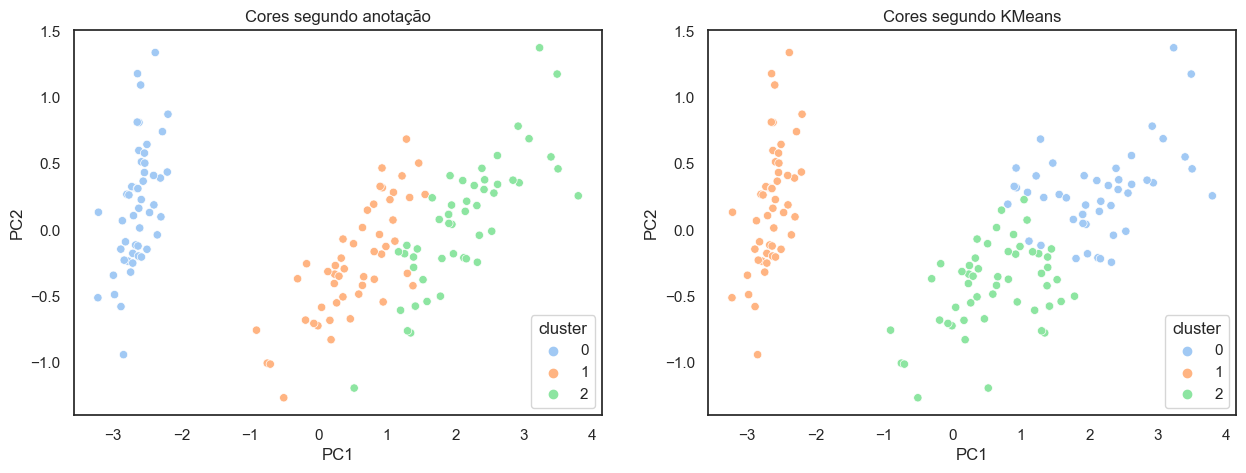

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(iris_df[iris.feature_names], iris.target, ax=axs[0])
axs[0].set_title('Cores segundo anotação')
plot_cluster_points(iris_df[iris.feature_names], kmeans_model.labels_, ax=axs[1])
axs[1].set_title('Cores segundo KMeans')

## Aula 07 - DBSCAN

In [151]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [152]:
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, 
                  n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

In [159]:
X = StandardScaler().fit_transform(X)

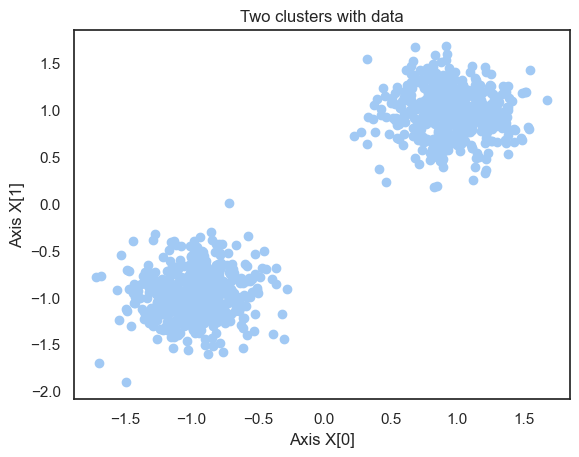

In [160]:
plt.scatter(X[:,0], X[:,1], marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [161]:
epsilon = 1.0
min_samples = 13

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [162]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


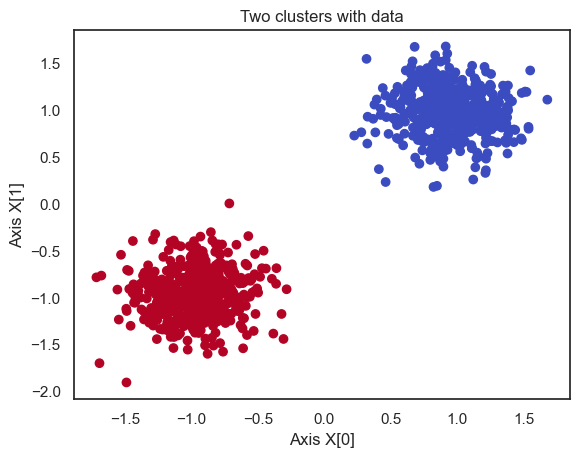

In [163]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', db.labels_))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [76]:
# Dica de Walter Pereira
from pivottablejs import pivot_ui

pivot_ui(df)